In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r"baby_names.csv", encoding="utf-8")
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [26]:
df.shape

(1016395, 7)

In [27]:
# drop the columns "unnamed" and "id"

In [28]:
help(df.drop)

Help on method drop in module pandas.core.frame:

drop(labels: 'IndexLabel' = None, *, axis: 'Axis' = 0, index: 'IndexLabel' = None, columns: 'IndexLabel' = None, level: 'Level' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or '

In [29]:
df.drop(["Unnamed: 0", "Id"], axis=1, inplace=True)

In [30]:
# plot as a pie chart male names vs female

<Axes: ylabel='count'>

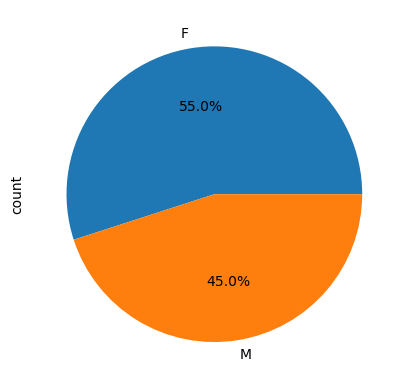

In [31]:
df["Gender"].value_counts().plot.pie(autopct = "%1.1f%%")

In [32]:
# how many different names exist in the dataset?

In [43]:
df["Name"].nunique()

17632

In [ ]:
# what is the most populat name?

In [42]:
names = df.groupby("Name")["Count"].sum()
names = names.sort_values(ascending=False)
names.head()

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

In [44]:
# what is the most popular name in the state on NY in 2004

In [45]:
df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [66]:
cond_2004 = df["Year"] == 2004
cond_NY = df["State"] == "NY"

df_2004_NY = df[cond_2004 & cond_NY]
df_2004_NY.sort_values("Count", ascending=False).head()

,Name,Year,Gender,State,Count
673685,Michael,2004,M,NY,2351
673686,Matthew,2004,M,NY,2029
673687,Joseph,2004,M,NY,1870
673688,Daniel,2004,M,NY,1683
673689,Ryan,2004,M,NY,1673


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Name    1016395 non-null  object
 1   Year    1016395 non-null  int64 
 2   Gender  1016395 non-null  object
 3   State   1016395 non-null  object
 4   Count   1016395 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.8+ MB


In [107]:
df_michael = df[df["Name"].str.contains("Michael", case=False)]
df_michael_count = df_michael.groupby(["State", "Year", "Name"])[["Count"]].sum()
df_michael_count.filter(like='NY', axis=0)

Count
State Year Name                
NY    2004 Johnmichael        6
           Michael         2361
           Michaela          87
           Michaella          9
      2005 Michael         2088
           Michaela          81
      2006 Michael         1987
           Michaela          56
      2007 Michael         1939
           Michaela          79
           Michaelangelo      8
      2008 Johnmichael        5
           Michael         1751
           Michaela          80
           Michaella          6
      2009 Johnmichael        6
           Michael         1712
           Michaela          72
      2010 Michael         1514
           Michaela          69
           Michaelangelo      6
      2011 Michael         1453
           Michaela          69
           Michaelangelo      8
      2012 Michael         1388
           Michaela          68
           Michaella          6
      2013 Michael         1222
           Michaela          61
      2014 Johnmichael        5
           Michael         1233
           Michaela          63

In [74]:
help(df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``